In [1]:
%matplotlib inline
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
def model_orbit(t, state):
  mu = 3.986004418E+05  # GM_earth [km^3/s^2]
  x = state[0]
  y = state[1]
  v_x = state[2]
  v_y = state[3]
  a_x = -mu * x / (x ** 2 + y ** 2) ** (3 / 2)
  a_y = -mu * y / (x ** 2 + y ** 2) ** (3 / 2)
  dstate_dt = [v_x, v_y, a_x, a_y]
  return dstate_dt

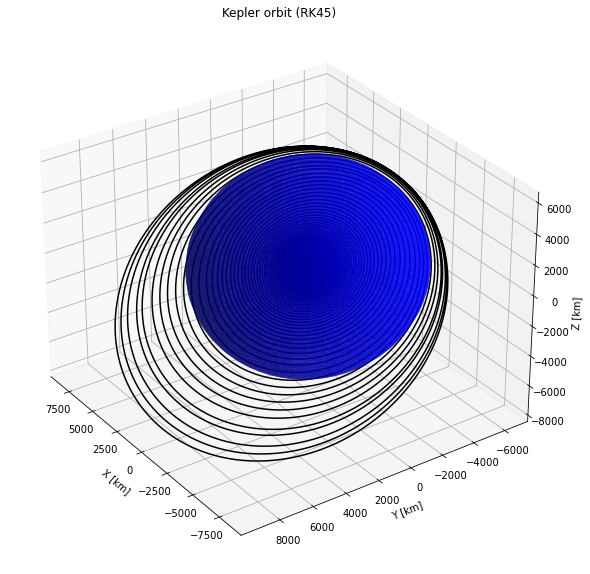

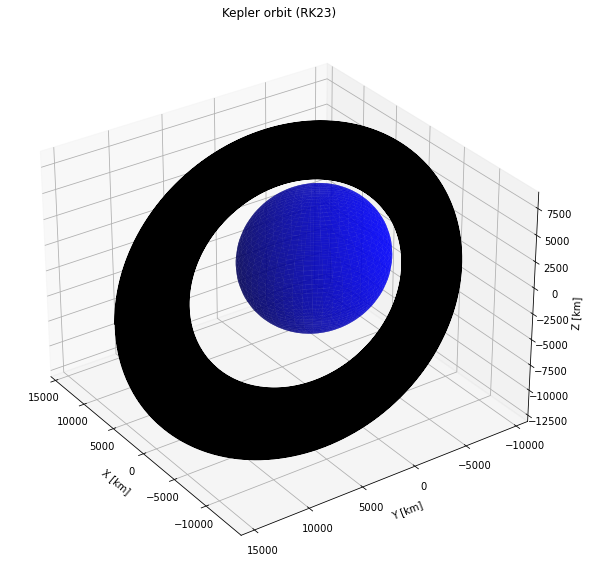

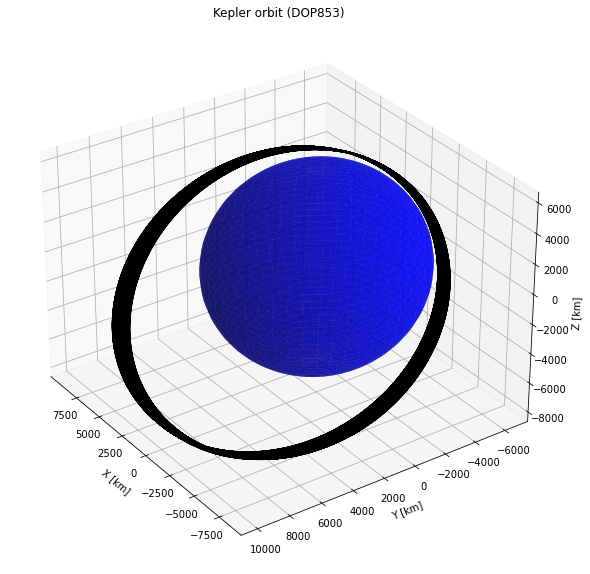

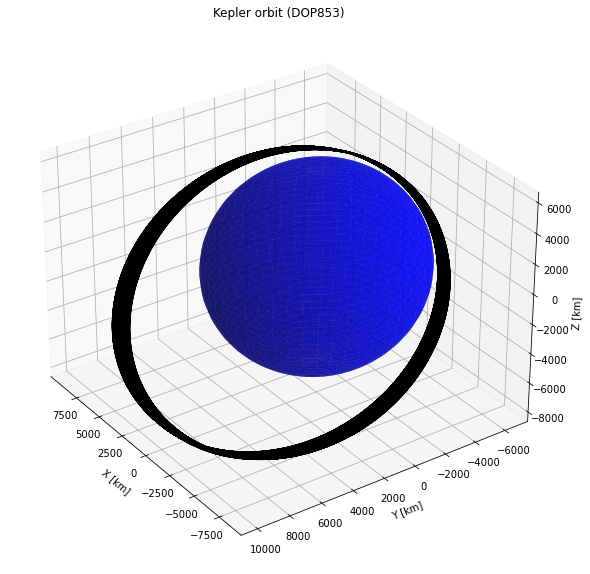

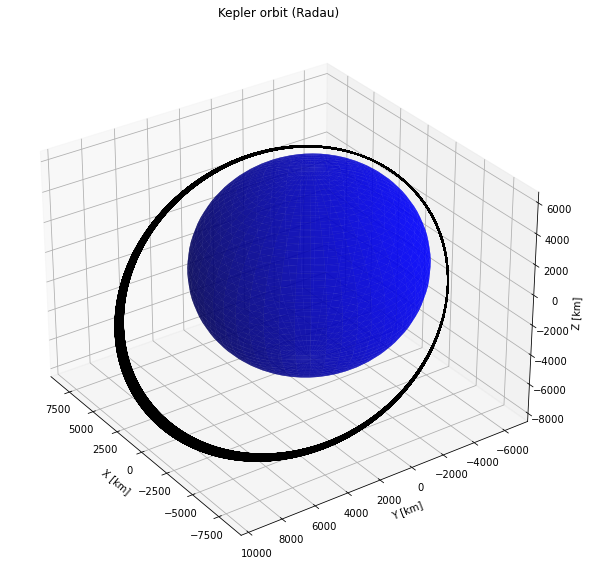

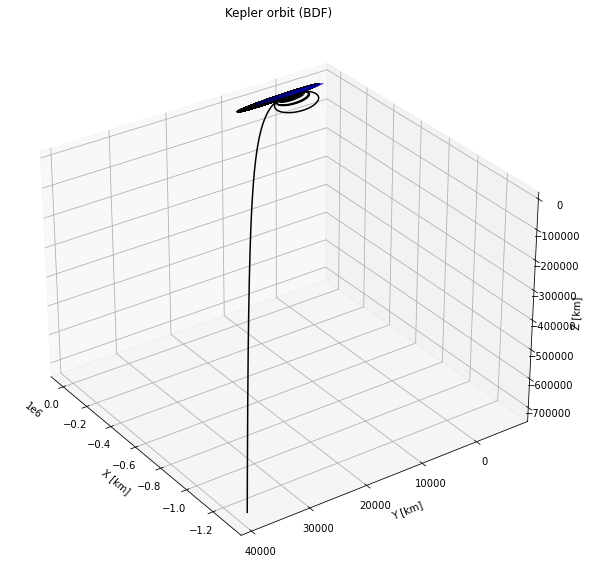

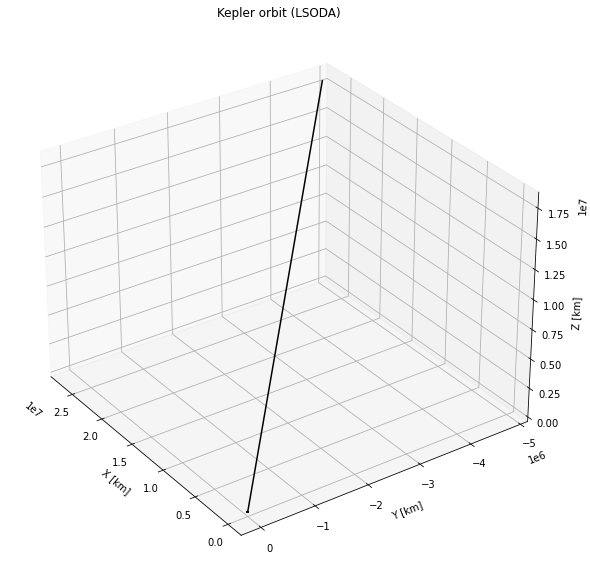

In [5]:
def solve(method):
    # Initial Conditions
    # x y z (km) v_x v_y v_z (km/s)
    state_0 = [-2500, -5500, 7.5, 0]

    # Time Array
    t_span = [0, 600*3600]
    t = np.linspace(0, 600*3600, 2000000)  # 600 hours

    # Solving ODE
    sol = solve_ivp(model_orbit, t_span, state_0, method=method, t_eval=t)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')
    ax.view_init(30, 145)
    ax.plot(sol.y[0, :],
            sol.y[1, :],
            sol.y[2, :], 'black')
    ax.set_title(f'Kepler orbit ({method})')
    ax.set_xlabel('X [km]')
    ax.set_ylabel('Y [km]')
    ax.set_zlabel('Z [km]')
    # Setting up Spherical Earth to Plot
    N = 50
    phi = np.linspace(0, 2 * np.pi, N)
    theta = np.linspace(0, np.pi, N)
    theta, phi = np.meshgrid(theta, phi)

    r_Earth = 6378.14  # Average radius of Earth [km]
    X_Earth = r_Earth * np.cos(phi) * np.sin(theta)
    Y_Earth = r_Earth * np.sin(phi) * np.sin(theta)
    Z_Earth = r_Earth * np.cos(theta)

    ax.plot_surface(X_Earth, Y_Earth, Z_Earth, color='blue', alpha=0.7)

    plt.show()

for i in ['RK45', 'RK23', 'DOP853', 'DOP853', 'Radau', 'BDF', 'LSODA']:
    solve(i)